<a href="https://colab.research.google.com/github/KorStats/classification-project/blob/main/(240423)_%EC%8B%A4%ED%97%983_%EB%B6%88%EC%9A%A9%EC%96%B4%EC%B2%98%EB%A6%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 application_data.csv  'My Drive'      기계학습특론프로젝트   딥러닝
'Colab Notebooks'       기계학습특론   ★논문분석


In [ ]:
import pandas as pd
df=pd.read_excel('/content/gdrive/MyDrive/기계학습특론프로젝트/채용공고_보안.xlsx')

# 문자 전처리하기

In [ ]:
pip install konlpy

In [ ]:
# 직무 구분자 '-'에 짤려나가지 않도록 하기
df['주요업무']=df['주요업무'].str.replace("isms-p",'ISMS_P',regex=True)
df['주요업무']=df['주요업무'].str.replace("ISMP-P",'ISMS_P',regex=True)
df['주요업무']=df['주요업무'].str.replace("PCI-DSS",'PCI_DSS',regex=True)

In [ ]:
df.head(3)

,기업명,채용제목,주요업무,자격요건,우대사항
0,마이뮤직테이스트,Backend Engineer,- 성능향상과 Scalability를 위한 최적화- 보안과 데이터 보호- 데이터베이...,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...
1,미미박스(MEMEBOX),DevOps Engineer,ᆞ AWS상 인프라 운영 유지 및 관리ᆞ 배포 및 CI/CD 개발 운영 및 유지ᆞ ...,ᆞ AWS 기반의 Container 환경 구축 및 CI/CD 등 자동화 관련 기솔에...,ᆞ AWS Certificate 보유ᆞ IT 프로젝트 아키텍트 경험ᆞ JAVA/PH...
2,미미박스(MEMEBOX),Database Administrator,"ᆞ Database를 백업, 복원, 모니터링, 튜닝ᆞ 신규 또는 개선 개발 프로젝트...",ᆞ AWS RDS (Mysql) 사용 경험ᆞ Mysql 5년 이상 사용 경험ᆞ Tr...,ᆞ DB 장애 복구 경험ᆞ 1가지 이상 NoSQL 사용 경험


In [ ]:
import re
def split_tasks(text):
    split_text = re.split(r'\s*[\-•ㆍᆞ・・\n.]\s*', text) #해당 문자열이 들어간 기준으로 잘라내기
    return [s.strip() for s in split_text if s.strip()]

In [ ]:
task_split_result=[]
for task in df['주요업무']:
  result=split_tasks(task)
  task_split_result.append(result)
len(task_split_result) #2661개의 채용공고 정보 수집함

2661

In [ ]:
# 직무 정보로 쪼개기
company_list=[]
title_list=[]
qualify_list=[]
prefer_list=[]
task_list=[]

for k in range(df.shape[0]):
  company=df.iloc[k]['기업명']
  title=df.iloc[k]['채용제목']
  qualify=df.iloc[k]['자격요건']
  prefer=df.iloc[k]['우대사항']
  tasks=task_split_result[k]
  for task in tasks:
    company_list.append(company)
    title_list.append(title)
    qualify_list.append(qualify)
    prefer_list.append(prefer)
    task_list.append(task)

rows = zip(company_list, title_list, task_list, qualify_list, prefer_list)
df = pd.DataFrame(rows, columns=['기업명', '채용제목', '주요업무', '지원자격', '우대사항'])
df.head(3)

,기업명,채용제목,주요업무,지원자격,우대사항
0,마이뮤직테이스트,Backend Engineer,성능향상과 Scalability를 위한 최적화,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...
1,마이뮤직테이스트,Backend Engineer,보안과 데이터 보호,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...
2,마이뮤직테이스트,Backend Engineer,"데이터베이스 솔루션 디자인및 구현음악과 기술에 대한 열정이 넘치는 사람들로 가득한,...",- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...


In [ ]:
df.shape #총 14849개의 보안직무 정보 찾아냄

(14849, 5)

Text(0, 0.5, 'Freq')

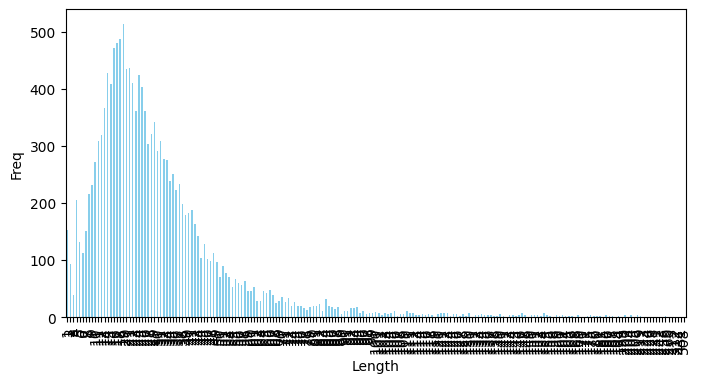

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['업무길이'] = df['주요업무'].apply(len)
length_frequency = df['업무길이'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
length_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Length')
plt.ylabel('Freq')

In [ ]:
df=df[(df['업무길이']>=5) & (df['업무길이']<=50)] #너무짧거나 긴 문장 삭제

In [ ]:
df.shape

(12556, 6)

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt
okt=Okt()

#조사, 어미, 구두점 제거, 어간 추출
def okt_clean(text):
  clean_text=[]
  for word in okt.pos(text, stem=True):
    if word[1] not in ['Josa', 'Eomi', 'Punction']:
      clean_text.append(word[0])
  return " ".join(clean_text)

clean_text=[]
for text in df['주요업무']:
  result=okt_clean(text)
  clean_text.append(result)

clean_text=pd.DataFrame(clean_text, columns=['주요업무_C'])
df= pd.concat([df, clean_text], axis=1)

In [ ]:
df.head(3)

,기업명,채용제목,주요업무,지원자격,우대사항,업무길이,주요업무_C
0,마이뮤직테이스트,Backend Engineer,성능향상과 Scalability를 위한 최적화,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,25.0,성능 향상 Scalability 를 위 최적화
1,마이뮤직테이스트,Backend Engineer,보안과 데이터 보호,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,10.0,보안 데이터 보호
3,마이뮤직테이스트,Backend Engineer,우리는 콘서트 시장의 패러다임을 획기적으로 바꿀 수 있는 서비스를 만들고 있습니다,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,45.0,"이 따르다 열정 적 창의 적 , 즐겁다 함께 일 하다 사람 들 찾다 있다"


In [ ]:
df['주요업무_C']=df['주요업무_C'].astype('str')

In [ ]:
# 불용어 제거
def remove_stopwords(text):
  tokens=text.split(' ')
  stops=['합니다', '하는', '할', '하는', '한다', '그리고', '입니다', '그', '등', '이런', '것', '제', '더', '및']
  meaningful_words=[w for w in tokens if not w in stops]
  return ' '.join(meaningful_words)
df['주요업무_C']=df['주요업무_C'].map(remove_stopwords)

In [ ]:
df.head(3)

,기업명,채용제목,주요업무,지원자격,우대사항,업무길이,주요업무_C
0,마이뮤직테이스트,Backend Engineer,성능향상과 Scalability를 위한 최적화,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,25.0,성능 향상 Scalability 를 위 최적화
1,마이뮤직테이스트,Backend Engineer,보안과 데이터 보호,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,10.0,보안 데이터 보호
3,마이뮤직테이스트,Backend Engineer,우리는 콘서트 시장의 패러다임을 획기적으로 바꿀 수 있는 서비스를 만들고 있습니다,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,45.0,"이 따르다 열정 적 창의 적 , 즐겁다 함께 일 하다 사람 들 찾다 있다"


# 단어 벡터화

## CountVectorizer+K-means

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
corpus=df['주요업무_C']
bow=vector.fit_transform(corpus)

In [ ]:
columns=[]
for k, v in sorted(vector.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
Bow=pd.DataFrame(bow.toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(Bow)
prediction=kmeans.predict(Bow)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

70209.61302428858

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(Bow, prediction)
score

0.08068210832972952

#TF-IDF+Kmeans

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=df['주요업무_C']
tfidf=TfidfVectorizer().fit(corpus)
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(corpus).toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)
prediction=kmeans.predict(tfidf)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

11491.462000581618

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)
score

0.15289013613463032

# TF-IDF + 한국어토큰화+KMeans

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer().fit(tokenized_data)
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)
prediction=kmeans.predict(tfidf)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

11352.506510211311

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)
score

0.15620792427199737

# TF-idf(sublinear_tf 적용) +한국어토큰화+K-means

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(sublinear_tf=True).fit(tokenized_data) #sublinear_tf : smoothing 효과
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)
prediction=kmeans.predict(tfidf)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

11354.529432779536

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)
score

0.15703060854691497

# TF-IDF 조정해보기

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)
prediction=kmeans.predict(tfidf)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

11028.970744130425

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)

In [ ]:
score

0.16406466491465305

# Noun으로 해보기

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.nouns(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf)
prediction=kmeans.predict(tfidf)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

10607.075377431007

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)
score

0.08904576248901801

# 제일 잘 나온거로 군집 수 결정

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

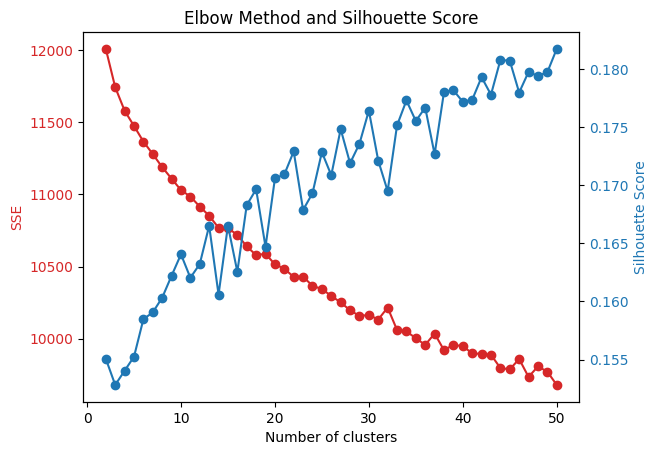

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 군집 수에 따른 SSE와 실루엣 스코어 계산
sse = []
silhouette_scores = []
cluster_range = range(2, 51)  # 군집 수를 2에서 50까지 변화시켜 보기

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(tfidf)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf, cluster_labels))

# 엘보우 방법과 실루엣 스코어 결과 시각화
fig, ax1 = plt.subplots()

# SSE Plot
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='tab:red')
ax1.plot(cluster_range, sse, marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 실루엣 스코어 Plot
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:blue')
ax2.plot(cluster_range, silhouette_scores, marker='o', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Elbow Method and Silhouette Score')
plt.show()

## Noun으로 다시

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.nouns(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

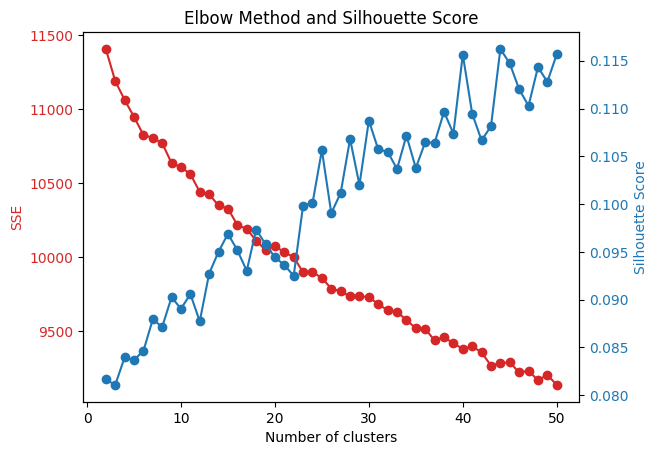

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 군집 수에 따른 SSE와 실루엣 스코어 계산
sse = []
silhouette_scores = []
cluster_range = range(2, 51)  # 군집 수를 2에서 50까지 변화시켜 보기

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(tfidf)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf, cluster_labels))

# 엘보우 방법과 실루엣 스코어 결과 시각화
fig, ax1 = plt.subplots()

# SSE Plot
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='tab:red')
ax1.plot(cluster_range, sse, marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 실루엣 스코어 Plot
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:blue')
ax2.plot(cluster_range, silhouette_scores, marker='o', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Elbow Method and Silhouette Score')
plt.show()

Noun만 이용하니까 결과가 더 안좋다...

# 다른 군집화 방법 적용해보기 (DBSCAN)

In [ ]:
# t-SNE 차원축소 & DBSCAN

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
#DBSCAN 적용
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
prediction_dbscan = dbscan.fit_predict(tfidf)

from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction_dbscan)
score

-0.0015595194720706314

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.1 MB/s eta 0:00:00


# PCA 조정(PCA=10)

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 33.8 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
tfidf_pca=pca.fit_transform(tfidf)

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 군집 수에 따른 SSE와 실루엣 스코어 계산
sse = []
silhouette_scores = []
cluster_range = range(2, 31)  # 군집 수를 2에서 30까지 변화시켜 보기

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(tfidf_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_pca, cluster_labels))

# 엘보우 방법과 실루엣 스코어 결과 시각화
fig, ax1 = plt.subplots()

# SSE Plot
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='tab:red')
ax1.plot(cluster_range, sse, marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 실루엣 스코어 Plot
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:blue')
ax2.plot(cluster_range, silhouette_scores, marker='o', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Elbow and Silhouette Score')
plt.show()

# 여기까지 진행됨

# PCA 조정해보기 (PCA=2)

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 29.5 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무_C']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
tfidf_pca=pca.fit_transform(tfidf)

n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf_pca)
prediction=kmeans.predict(tfidf_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

9.323732452722778

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(tfidf, prediction)
score

0.13549097884338532

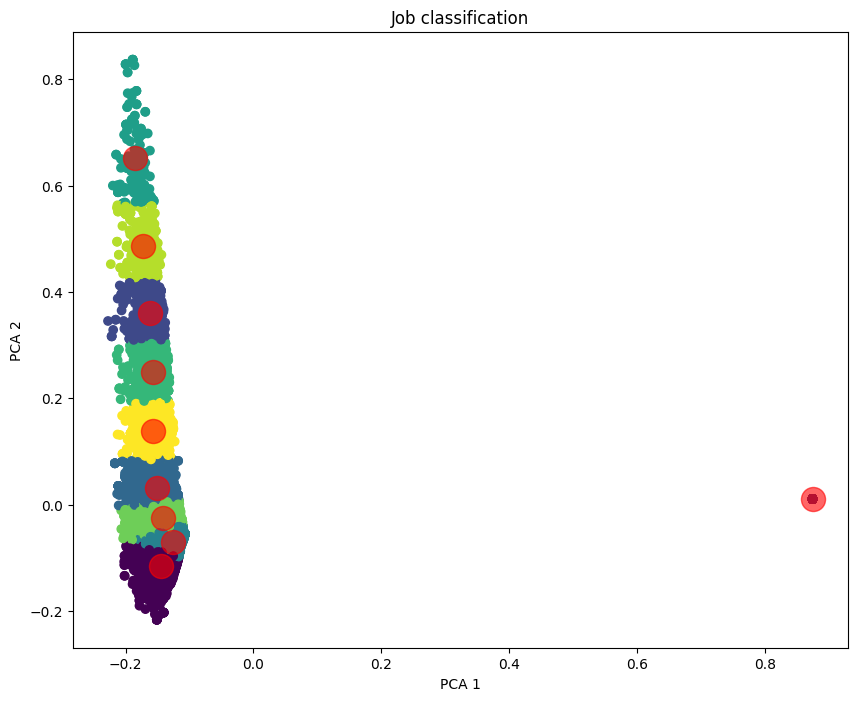

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=prediction, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6)
plt.title("Job classification")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# t-SNE 차원축소 & DBSCAN

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf)

# DBSCAN 군집화
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_tsne)

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
if len(set(clusters_dbscan)) > 1:  # 실루엣 스코어를 계산하기 위해서는 최소 2개 이상의 클러스터가 필요
    silhouette_avg = silhouette_score(tfidf, clusters_dbscan)
else:
    silhouette_avg = "Cannot compute Silhouette Score with only one cluster."

silhouette_avg  # 클러스터 레이블과 실루엣 스코어 출력

-0.21685812049326145

# PCA=5

In [ ]:
from konlpy.tag import Kkma
import numpy as np
from sklearn.cluster import KMeans

kkma=Kkma()

text_list=df['주요업무']

def tokenize_korean_text(text_list):
    return [" ".join(kkma.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9).fit(tokenized_data) #설정값 변경해보기
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfidf=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
tfidf_pca=pca.fit_transform(tfidf)

n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tfidf_pca)
prediction=kmeans.predict(tfidf_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

261.21258457730704

https://velog.io/@gangjoo/ML-%EA%B5%B0%EC%A7%91%ED%99%94-%EC%8B%A4%EB%A3%A8%EC%97%A3-%EB%B6%84%EC%84%9D-Silhouette-Analysis#%EC%8B%9C%EA%B0%81%ED%99%94%EB%A5%BC-%ED%86%B5%ED%95%9C-%EA%B5%B0%EC%A7%91-%EA%B0%9C%EC%88%98-%EC%B5%9C%EC%A0%81%ED%99%94

In [ ]:
# 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X_combined_reduced[:, 0], X_combined_reduced[:, 1], c=clusters_combined, cmap='viridis', marker='o')
centers_combined = kmeans_combined.cluster_centers_
plt.scatter(centers_combined[:, 0], centers_combined[:, 1], c='red', s=300, alpha=0.6)
plt.title("Clusters of Detailed Security Jobs with More Info")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

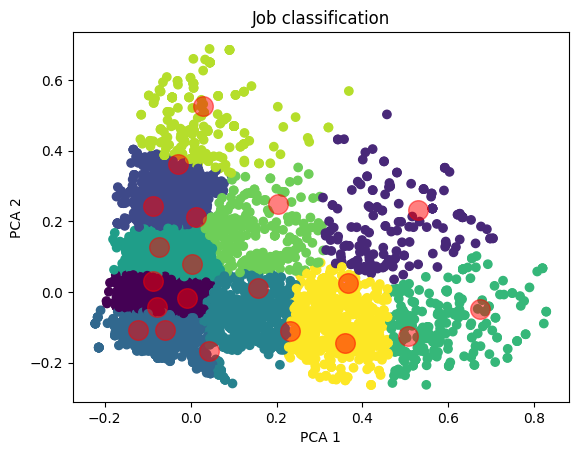

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=prediction, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6)
plt.title("Job classification")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# 군집 수에 따른 SSE(Within-Cluster Sum of Square)와 실루엣 스코어 계산
sse = []
silhouette_scores = []
cluster_range = range(2, 11)  # 군집 수를 2에서 10까지 변화시켜 보기

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_reduced, cluster_labels))

# 엘보우 방법과 실루엣 스코어 결과 시각화
fig, ax1 = plt.subplots()

# SSE Plot
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='tab:red')
ax1.plot(cluster_range, sse, marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 실루엣 스코어 Plot
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:blue')
ax2.plot(cluster_range, silhouette_scores, marker='o', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Elbow Method and Silhouette Score for Optimal k')
plt.show()

# BERT 모델

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# BERT tokenizer 및 모델 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 텍스트를 BERT 임베딩으로 변환하는 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    # CLS 토큰의 임베딩을 반환
    return outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

# 각 텍스트에 대한 BERT 임베딩 계산
embeddings = []
for text in df['주요업무']:
    embeddings.append(get_bert_embedding(text))

# Numpy 배열로 변환
embeddings = np.array(embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-61c2c48937ae>", line 24, in <cell line: 23>
    embeddings.append(get_bert_embedding(text))
  File "<ipython-input-44-61c2c48937ae>", line 17, in get_bert_embedding
    outputs = model(**inputs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1520, in _call_impl
    return forward_call(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_bert.py", line 1013, in forward
    encoder_outputs = self.encoder(
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1511, in _wrapped_call_impl
    return self._call_impl(

TypeError: object of type 'NoneType' has no len()

Exception ignored in: <function _xla_gc_callback at 0x7e6d43f9d360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9)
X_tfidf = tfidf_vectorizer.fit_transform(security_jobs['cleaned_text'])

# PCA로 차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# K-means 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6)
plt.title("Clusters of Security Jobs")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
task_split_result=pd.DataFrame(task_split_result)
df=pd.concat([df, task_split_result])
df.head(3)

,기업명,주요업무,자격요건,우대사항,0,1,2,3,4,5,...,32,33,34,35,36,37,38,39,40,41
0,마이뮤직테이스트,- 성능향상과 Scalability를 위한 최적화- 보안과 데이터 보호- 데이터베이...,- 3년이상의 Python 외의 언어로 웹서버 개발 혹은 Python으로 웹서버 개...,- 새로운 기술에 대한 적극적인 관심- 기존 솔루션을 유지/보수하면서 적극적으로 문...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,미미박스(MEMEBOX),ᆞ AWS상 인프라 운영 유지 및 관리ᆞ 배포 및 CI/CD 개발 운영 및 유지ᆞ ...,ᆞ AWS 기반의 Container 환경 구축 및 CI/CD 등 자동화 관련 기솔에...,ᆞ AWS Certificate 보유ᆞ IT 프로젝트 아키텍트 경험ᆞ JAVA/PH...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,미미박스(MEMEBOX),"ᆞ Database를 백업, 복원, 모니터링, 튜닝ᆞ 신규 또는 개선 개발 프로젝트...",ᆞ AWS RDS (Mysql) 사용 경험ᆞ Mysql 5년 이상 사용 경험ᆞ Tr...,ᆞ DB 장애 복구 경험ᆞ 1가지 이상 NoSQL 사용 경험,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
company_list=[]
title_list=[]
qualify_list=[]
prefer_list=[]
task_list=[]

for k in range(df.shape[0]):
  company=df.iloc[k]['기업명']
  title=df.iloc[k]['채용제목']
  qualify=df.iloc[k]['지원자격']
  prefer=df.iloc[k]['우대사항']
  tasks=(df[k:k+1]['주요업무'].str.split('\n').tolist())[0]
  for task in tasks:
    company_list.append(company)
    title_list.append(title)
    qualify_list.append(qualify)
    prefer_list.append(prefer)
    task_list.append(task)

rows = zip(company_list, title_list, task_list, qualify_list, prefer_list)
df = pd.DataFrame(rows, columns=['기업명', '채용제목', '주요업무', '지원자격', '우대사항'])
df.head(3)

In [ ]:

# 분리된 직무별로 새로운 데이터프레임 생성
expanded_rows_better = []
for _, row in df.iterrows():
    jobs = split_jobs_better(df['주요업무'])
    for job in jobs:
        expanded_row = df.to_dict()
        expanded_row['split_job'] = job
        expanded_rows_better.append(expanded_row)

# 새로운 데이터프레임 생성
expanded_jobs_better = pd.DataFrame(expanded_rows_better)

# 결과 확인
expanded_jobs_better[['기업명', '지역', '주요업무', 'split_job']].head(10)

# 한국어토크나이저 적용하기

## init='k-means++ 적용해보기

In [ ]:
from konlpy.tag import Okt
import numpy as np
from sklearn.cluster import KMeans

okt = Okt()

text_list=df['주요업무']

def tokenize_korean_text(text_list):
    return [" ".join(okt.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=2).fit(tokenized_data)
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfid=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)

In [ ]:
# cluster 갯수를 10으로 설정
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',random_state=0)
kmeans.fit(tfid)
prediction=kmeans.predict(tfid)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_ # 이게 SSE (오차제곱합)

1581.103730443163

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette_avg = silhouette_score(tfid, prediction)  # 실루엣 점수
calinski_harabasz = calinski_harabasz_score(tfid, prediction)  # 캘린스키-하라바스 점수
davies_bouldin = davies_bouldin_score(tfid, prediction)  # 데이비스-볼딘 점수
print(silhouette_avg, calinski_harabasz, davies_bouldin)

0.032400901038183376 22.865783740657868 4.493687026562145


# Elbow 사용

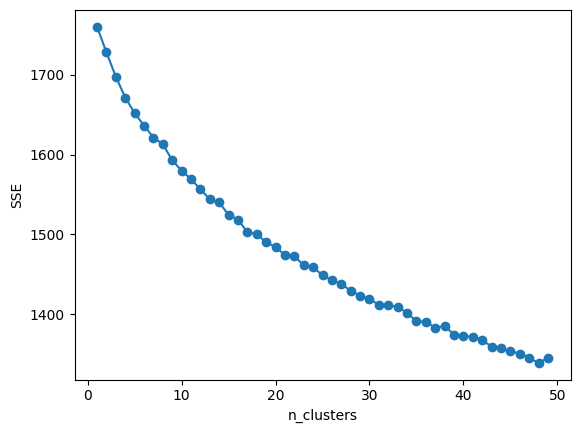

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

text_list=df['주요업무']
tokenized_data=tokenize_korean_text(text_list)
vectorizer=TfidfVectorizer(min_df=2, max_df=0.9)
X=vectorizer.fit_transform(tokenized_data)

def elbow(X):
    sse = [] # 오차제곱합
    for i in range(1,50):
        km = KMeans(n_clusters=i, init='k-means++',random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,50), sse, marker ='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(X)

In [ ]:
from konlpy.tag import Okt
import numpy as np
from sklearn.cluster import KMeans

okt = Okt()

text_list=df['주요업무']

def tokenize_korean_text(text_list):
    return [" ".join(okt.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=100, max_df=0.9).fit(tokenized_data)
columns=[]
for k, v in sorted(tfidf.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)
import pandas as pd
tfid=pd.DataFrame(tfidf.transform(tokenized_data).toarray(), columns=columns)
tfid

,개발,관리,구축,기술,대응,보안,분석,서비스,솔루션,수립,...,인프라,점검,정보보호,정책,지원,진단,취약점,클라우드,하고,합니다
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.734673,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.790418,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.437592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.440827,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.610373,...,0.0,0.0,0.0,0.658116,0.0,0.0,0.0,0.0,0.000000,0.0
1823,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.680011,...,0.0,0.0,0.0,0.733202,0.0,0.0,0.0,0.0,0.000000,0.0
1824,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1825,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# cluster 갯수를 20으로 설정
from sklearn.cluster import KMeans
n_clusters=20
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',random_state=0)
kmeans.fit(tfid)
prediction=kmeans.predict(tfid)
df['cluster']=prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_ # 이게 SSE (오차제곱합)

593.6277304211574

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette_avg = silhouette_score(tfid, prediction)  # 실루엣 점수
calinski_harabasz = calinski_harabasz_score(tfid, prediction)  # 캘린스키-하라바스 점수
davies_bouldin = davies_bouldin_score(tfid, prediction)  # 데이비스-볼딘 점수
print(silhouette_avg, calinski_harabasz, davies_bouldin)

0.2755702527231697 140.38742362630606 1.3376338050812095


In [ ]:
df['cluster'].value_counts()

cluster
2     169
3     109
13    107
10    107
8     101
5      99
14     96
9      96
1      91
16     87
18     86
4      83
6      81
12     79
17     78
19     78
0      73
7      73
15     68
11     66
Name: count, dtype: int64

In [ ]:
df.to_csv('result.csv', encoding='utf-8-sig')

In [ ]:
df['cluster']=prediction

In [ ]:
df_1=df[df['cluster']==0]
df_2=df[df['cluster']==1]
df_3=df[df['cluster']==2]
df_4=df[df['cluster']==3]
df_5=df[df['cluster']==4]
df_6=df[df['cluster']==5]
df_7=df[df['cluster']==6]
df_8=df[df['cluster']==7]
df_9=df[df['cluster']==8]
df_10=df[df['cluster']==9]

text_1=''
text_2=''
text_3=''
text_4=''
text_5=''
text_6=''
text_7=''
text_8=''
text_9=''
text_10=''


for text in df_1['주요업무']:
    text_1=text_1+text
for text in df_2['주요업무']:
    text_2=text_2+text
for text in df_3['주요업무']:
    text_3=text_3+text
for text in df_4['주요업무']:
    text_4=text_4+text
for text in df_5['주요업무']:
    text_5=text_5+text
for text in df_6['주요업무']:
    text_6=text_6+text
for text in df_7['주요업무']:
    text_7=text_7+text
for text in df_8['주요업무']:
    text_8=text_8+text
for text in df_9['주요업무']:
    text_9=text_9+text
for text in df_10['주요업무']:
    text_10=text_10+text

In [ ]:
text_1

"우리는 완전하지 않습니다우리는 개선하기 위해 끊임없이 노력 중이며 아직 해결해야할 문제들이 많이 남아있습니다그래서 아주 특별한 개발팀에서 일할 똑똑하고, 자발적으로 동기가 부여된 개발자를 찾습니다Container 기반의 플랫폼 구축 및 운영회원 DB에 대한 보안 관련 업무를 지원서버 정책 수립 가능자 (보안이나 백업 등)뱅크샐러드 서비스의 안정적 운영을 위한 보안 관리뱅크샐러드 시스템 및 서비스 취약점 점검 및 분석뱅크샐러드 이용자 개인정보 보호 관련 업무제품 지원    > 커스터마이징    > 설치 자동화    > 제품 패키징js , Express 기반 서버 API 개발Sharding, 보안 아키텍처 개발제품 교육 및 담당 고객사 기술지원클라우드를 활용한 자동화된 서버 구성 및 인프라 구축운영, 클라이언트, 경영기획 등 다양한 팀에서 사용하는 시스템 구현애플리케이션 버그 수정 및 고객의 기술적인 이슈 해결인프라 확장 및 보안보안 플랫폼 개발SIEM 솔루션 운영 경험자(Qrader, Archsight 등)IoT 센서들간의 자율 통신을 위한 IoT Web 설계 및 개발시스템 & 웹 & 네트웍 로그 데이터 프로세싱ELK 스택, 아파치 하둡, 카프카, 파이선을 활용한 데이타 수집 & 분석위험분석 및 위험분석 상세평가내부 보안인프라 구축 및 관리(PC,H/W, S/W)신규 솔루션 / 서비스 보안 심의이용자 개인정보 보호 관련 업무보안 SW 기술지원 기반 업무 관리 시스템 총괄 업무알약 백신 제품 포함 자사 보안 솔루션 기술지원 (유선/원격/방문)보안 SW 기술지원 기반 업무 관리 시스템 총괄 업무알약 백신 제품 포함 자사 보안 솔루션 기술지원 (유선/원격/방문)BI 시스템 개발 및 운영데이터 플로우 분석 및 모니터링데이터센터 시스템 구성및 관리개인정보보호 정책 및 프로세스 수립, 운영 및 Compliance 대응개인정보보호 인식 제고(교육, 캠페인 등)사무실 임대차계약정보보안 감사 계획 수립 및 주기적 이행 점검정보보호 운영 및 보안 계획 수립level 포함)제품 

In [ ]:
# 나눔 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.font_manager as fm

# 설치된 폰트를 스캔
#fm._rebuild()

# WordCloud 설정에서 한글 폰트 경로 지정
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

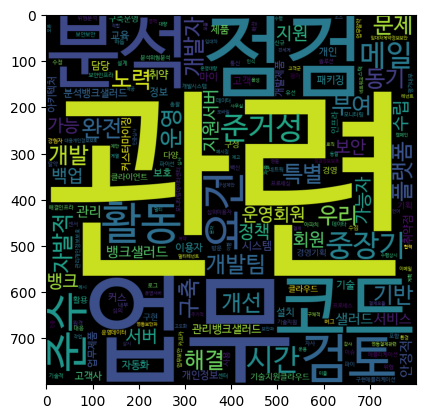

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Kkma
import numpy as np

kkma=Kkma()
nouns=kkma.nouns(text_1)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


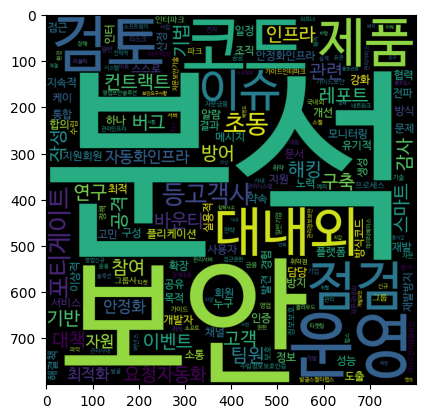

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Kkma
import numpy as np

kkma=Kkma()
nouns=kkma.nouns(text_2)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


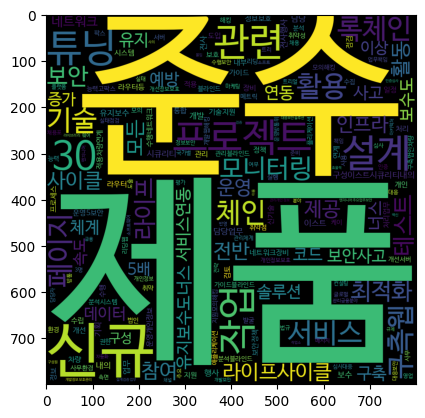

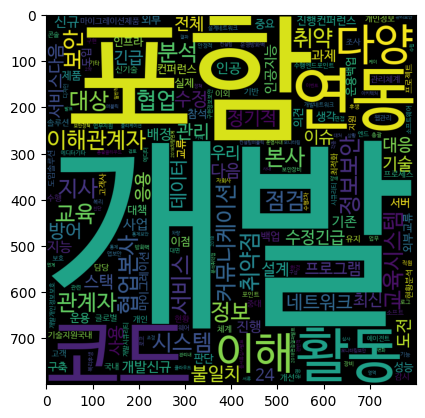

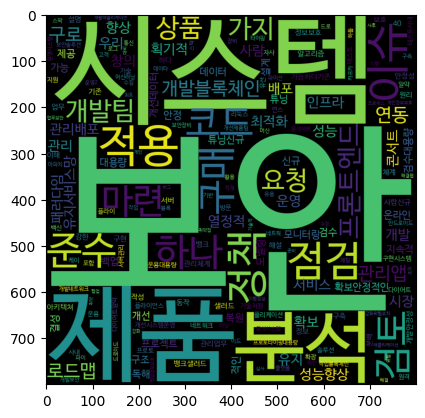

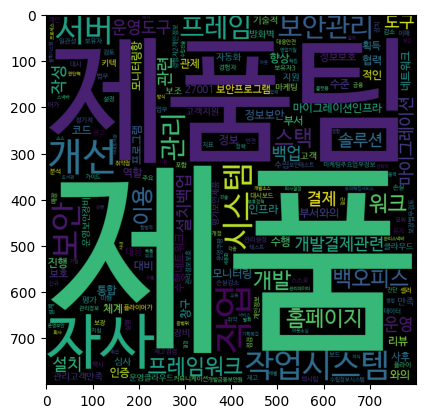

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Kkma
import numpy as np

kkma=Kkma()
nouns=kkma.nouns(text_3)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

kkma=Kkma()
nouns=kkma.nouns(text_4)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


kkma=Kkma()
nouns=kkma.nouns(text_5)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


kkma=Kkma()
nouns=kkma.nouns(text_6)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_data)

# K-means 클러스터링 진행
k = 10  # 클러스터 수 설정
model = KMeans(n_clusters=k, init='k-means++', random_state=42)
model.fit(X)

# 클러스터링 결과 할당
cluster_labels = model.labels_

# 각 직무별로 할당된 클러스터 확인
job_clusters = pd.DataFrame({'Job Description': job_detail, 'Cluster': cluster_labels})

job_clusters

In [ ]:
#참고
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
corpus=df['주요업무']
bow=vector.fit_transform(corpus)

# cluster 갯수를 10으로 설정
from sklearn.cluster import KMeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(Bow)
prediction=kmeans.predict(Bow)
df['cluster']=prediction

In [ ]:
from konlpy.tag import Okt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# KoNLPy의 Okt 형태소 분석기 초기화
okt = Okt()

text_list=df['업무내용']

# 한국어 텍스트 데이터 토큰화
def tokenize_korean_text(text_list):
    return [" ".join(okt.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(job_detail)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_data)

# K-means 클러스터링 진행
k = 8  # 클러스터 수 설정
model = KMeans(n_clusters=k, init='k-means++', random_state=42)
model.fit(X)

# 클러스터링 결과 할당
cluster_labels = model.labels_

# 각 직무별로 할당된 클러스터 확인
job_clusters = pd.DataFrame({'Job Description': job_detail, 'Cluster': cluster_labels})

job_clusters

In [ ]:
df_1=job_clusters[job_clusters['Cluster']==0]
df_2=job_clusters[job_clusters['Cluster']==1]
df_3=job_clusters[job_clusters['Cluster']==2]
df_4=job_clusters[job_clusters['Cluster']==3]
df_5=job_clusters[job_clusters['Cluster']==4]
df_6=job_clusters[job_clusters['Cluster']==5]
df_7=job_clusters[job_clusters['Cluster']==6]
df_8=job_clusters[job_clusters['Cluster']==7]
df_9=job_clusters[job_clusters['Cluster']==8]
df_10=job_clusters[job_clusters['Cluster']==9]

text_1=''
text_2=''
text_3=''
text_4=''
text_5=''
text_6=''
text_7=''
text_8=''
text_9=''
text_10=''

for text in df_1['원데이터']:
    text_1=text_1+text
for text in df_2['원데이터']:
    text_2=text_2+text
for text in df_3['원데이터']:
    text_3=text_3+text
for text in df_4['원데이터']:
    text_4=text_4+text
for text in df_5['원데이터']:
    text_5=text_5+text
for text in df_6['원데이터']:
    text_6=text_6+text
for text in df_7['원데이터']:
    text_7=text_7+text
for text in df_8['원데이터']:
    text_8=text_8+text
for text in df_9['원데이터']:
    text_9=text_9+text
for text in df_10['원데이터']:
    text_10=text_10+text

NameError: name 'job_clusters' is not defined

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

okt=Okt()
nouns=okt.nouns(text_1)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_2)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_3)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_4)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_5)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_6)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_7)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_8)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_9)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


okt=Okt()
nouns=okt.nouns(text_10)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_11)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_12)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


okt=Okt()
nouns=okt.nouns(text_13)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_14)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



okt=Okt()
nouns=okt.nouns(text_15)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_16)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



okt=Okt()
nouns=okt.nouns(text_17)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_18)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



okt=Okt()
nouns=okt.nouns(text_19)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_20)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



OSError: cannot open resource

## K-means

In [ ]:
from konlpy.tag import Okt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# KoNLPy의 Okt 형태소 분석기 초기화
okt = Okt()

text_list=df['주요업무']

# 한국어 텍스트 데이터 토큰화
def tokenize_korean_text(text_list):
    return [" ".join(okt.morphs(text)) for text in text_list]

tokenized_data = tokenize_korean_text(text_list)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_data)

# K-means 클러스터링 진행
k = 8  # 클러스터 수 설정
model = KMeans(n_clusters=k, init='k-means++', random_state=42)
model.fit(X)

# 클러스터링 결과 할당
cluster_labels = model.labels_

# 각 직무별로 할당된 클러스터 확인
job_clusters = pd.DataFrame({'Job Description': job_detail, 'Cluster': cluster_labels})

job_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'job_detail' is not defined

In [ ]:
job_clusters=job_clusters.reset_index()

In [ ]:
job_clusters.drop(['index'], axis=1, inplace=True)
job_clusters

,Job Description,Cluster
0,• 신규 고객사 및 파트너사 확보,5
1,"• 영업 자료 및 기본적인 문서 작성, 제안",0
2,• 영업 전략 작성 및 수행,0
3,• 입찰 제안 업무(기술팀과 협업),7
4,"• 솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환...",0
...,...,...
1092,프로젝트 관리,0
1093,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,6
1094,정보보안 인증 획득 지원,7
1095,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단",0


## 성능평가(Elbow 방법)

In [ ]:
model.inertia_ # 이게 SSE (오차제곱합)

1622.3210383250637

C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


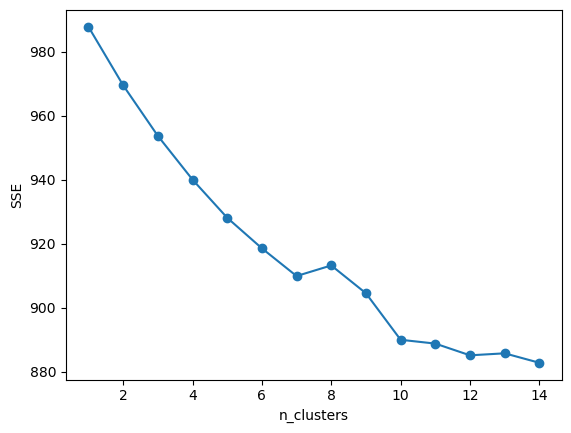

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

text_list=df['업무내용']
tokenized_data=tokenize_korean_text(job_detail)
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(tokenized_data)

def elbow(X):
    sse = [] # 오차제곱합
    for i in range(1,15):
        km = KMeans(n_clusters=i, init='k-means++',random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,15), sse, marker ='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(X)

10개가 최적이다

## 성능평가 : 실루엣 계수

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(X):
    si = [] # 실루엣계수
    for i in range(2,15): # cluster가 2개인것 부터 15개까지!!!!
        km = KMeans(n_clusters=i, init='k-means++',random_state=42)
        km.fit(X)
        si.append(silhouette_score(X, km.labels_))
    print(np.round(si,3))
sil(X) #클러스터 갯수가 2~15개에 따른 실루엣 계수 확인 (수치가 높을수록 좋음, 범위 0~1사이)

C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans

[0.03  0.033 0.036 0.038 0.041 0.043 0.038 0.04  0.046 0.045 0.045 0.042
 0.042]


## k=10으로 다시 모델링

In [ ]:
from konlpy.tag import Okt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# KoNLPy의 Okt 형태소 분석기 초기화
okt = Okt()


text_list=df['업무내용']

# 한국어 텍스트 데이터 토큰화
tokenized_data=[]

for text in text_list:
    result=okt.morphs(text)
    tokenized_data.append(result)


#Tf-IDF변환 수행
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_data = [" ".join(doc) for doc in tokenized_data]
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(preprocessed_data)

#k=10
k=10
model= KMeans(n_clusters=k, init='k-means++',random_state=42)
model.fit(X)
cluster_labels=model.labels_

job_clusters=pd.DataFrame({'원데이터' : text_list, '토큰화' : tokenized_data, 'Cluster' : cluster_labels})
job_clusters

C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,원데이터,토큰화,Cluster
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]",4
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]",4
3,입찰 제안 업무(기술팀과 협업),"[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]",9
4,"솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환경에...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...",1
...,...,...,...
1092,프로젝트 관리,"[프로젝트, 관리]",4
1093,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,"[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]",3
1094,정보보안 인증 획득 지원,"[정보보안, 인증, 획득, 지원]",5
1095,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]",2


In [ ]:
job_clusters=job_clusters.reset_index()
job_clusters.drop(['index'], axis=1, inplace=True)
job_clusters

,원데이터,토큰화,Cluster
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]",4
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]",4
3,입찰 제안 업무(기술팀과 협업),"[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]",9
4,"솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환경에...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...",1
...,...,...,...
1015,프로젝트 관리,"[프로젝트, 관리]",4
1016,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,"[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]",3
1017,정보보안 인증 획득 지원,"[정보보안, 인증, 획득, 지원]",5
1018,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]",2


In [ ]:
job_clusters['Cluster'].value_counts()

4    339
9    154
2    106
1     83
3     82
7     70
6     61
5     52
0     40
8     33
Name: Cluster, dtype: int64

In [ ]:
model.inertia_ # 이게 SSE (오차제곱합)

892.495074744292

In [ ]:
job_clusters.to_csv('E:\★직업분류 개발/결과.csv', encoding='utf-8-sig')

## 만든 cluster 별 워드클라우드

In [ ]:
job_clusters.head(3)

,원데이터,토큰화,Cluster
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]",4
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]",4


In [ ]:
df_1=job_clusters[job_clusters['Cluster']==0]
df_2=job_clusters[job_clusters['Cluster']==1]
df_3=job_clusters[job_clusters['Cluster']==2]
df_4=job_clusters[job_clusters['Cluster']==3]
df_5=job_clusters[job_clusters['Cluster']==4]
df_6=job_clusters[job_clusters['Cluster']==5]
df_7=job_clusters[job_clusters['Cluster']==6]
df_8=job_clusters[job_clusters['Cluster']==7]
df_9=job_clusters[job_clusters['Cluster']==8]
df_10=job_clusters[job_clusters['Cluster']==9]

text_1=''
text_2=''
text_3=''
text_4=''
text_5=''
text_6=''
text_7=''
text_8=''
text_9=''
text_10=''

for text in df_1['원데이터']:
    text_1=text_1+text
for text in df_2['원데이터']:
    text_2=text_2+text
for text in df_3['원데이터']:
    text_3=text_3+text
for text in df_4['원데이터']:
    text_4=text_4+text
for text in df_5['원데이터']:
    text_5=text_5+text
for text in df_6['원데이터']:
    text_6=text_6+text
for text in df_7['원데이터']:
    text_7=text_7+text
for text in df_8['원데이터']:
    text_8=text_8+text
for text in df_9['원데이터']:
    text_9=text_9+text
for text in df_10['원데이터']:
    text_10=text_10+text

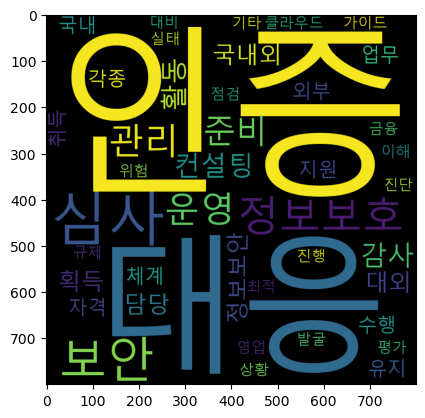

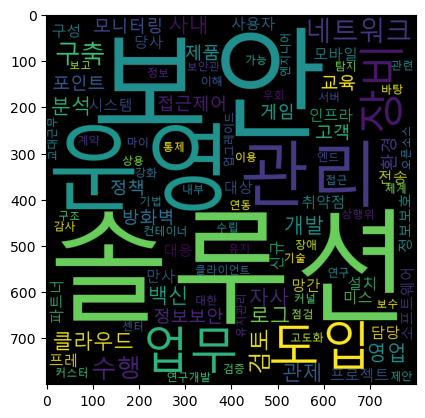

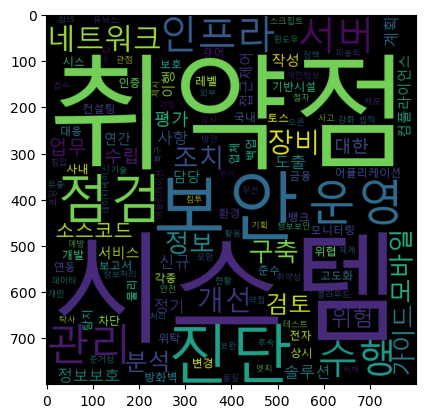

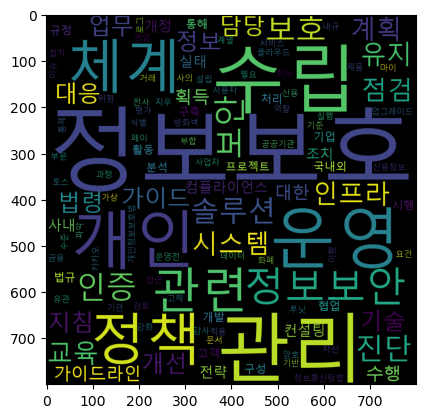

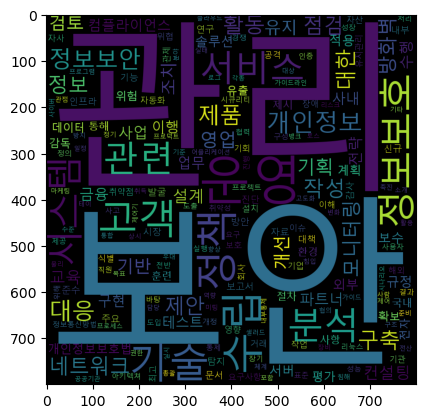

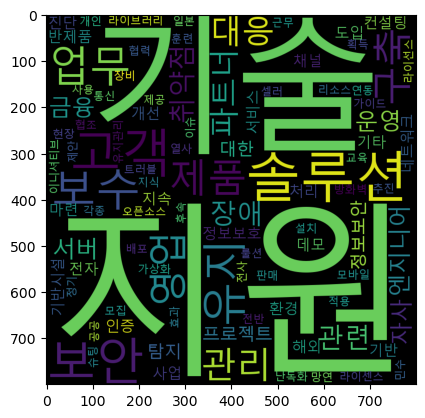

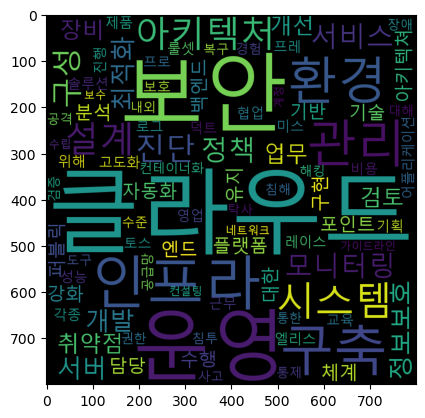

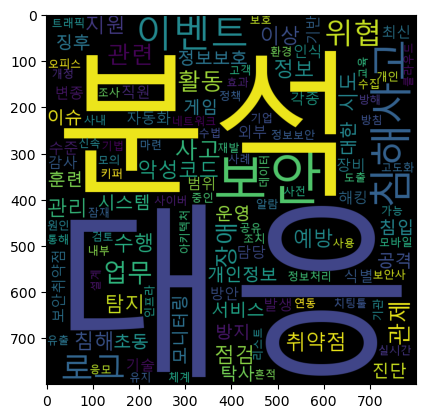

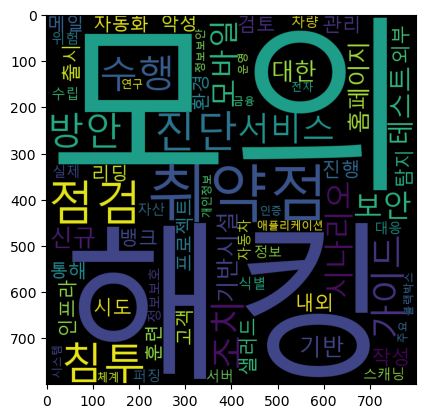

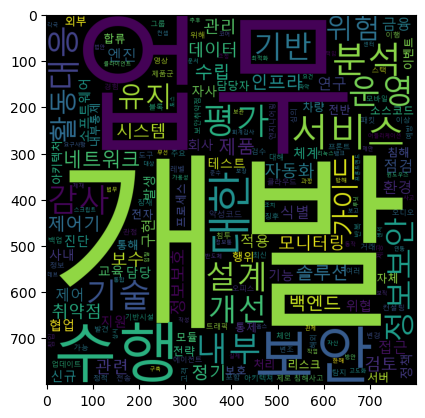

In [ ]:
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

okt=Okt()
nouns=okt.nouns(text_1)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_2)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_3)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_4)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_5)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_6)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_7)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_8)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

okt=Okt()
nouns=okt.nouns(text_9)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)


okt=Okt()
nouns=okt.nouns(text_10)
words=[n for n in nouns if len(n)>1] #길이 2 이상인 것만
c=Counter(words)
wc=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250)
gen=wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)



# 실험2. 불용어처리하기

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

text_list=df['업무내용']
stop_words = ['보안', '정보보호', '정보보안']

tokenized_data=[]
for text in text_list:
    result=okt.morphs(text)
    tokenized_data.append(result)

result = []
for w in tokenized_data:
    if w not in stop_words:
        result.append(w)

In [ ]:
result

[['신규', '고객', '사', '및', '파트너', '사', '확보'],
 ['영업', '자료', '및', '기본', '적', '인', '문서', '작성', ',', '제안'],
 ['영업', '전략', '작성', '및', '수행'],
 ['입찰', '제안', '업무', '(', '기술', '팀', '과', '협업', ')'],
 ['솔루션',
  '(',
  '서버',
  '/',
  '클라이언트',
  ')',
  '구조',
  '의',
  '이해',
  '를',
  '바탕',
  '으로',
  '솔루션',
  '을',
  '설치',
  '하고',
  ',',
  '고객',
  '사',
  '환경',
  '에',
  '맞게',
  '커스터',
  '마이',
  '징',
  '수행'],
 ['고객', '요구사항', '에', '부합', '하는', '솔루션', '기능', '에', '대한', '기술', '협상'],
 ['기술', '지원', '및', '장애', '지원'],
 ['유지', '보수', '(', '점검', ')', '업무'],
 ['IPS', '/', '웹', '방화벽', '/', '방화벽', '대', '개체'],
 ['WINS', '≫', 'WINS'],
 ['파이오링크', '≫', '모니터', '랩'],
 ['체크', '포인트', ',', '시', '큐', '아이', ',', '주니퍼', '등'],
 ['고객', '사', '에서', '제품', '을', '잘', '사용', '할', '수', '있게', '지원', '합니다', '.'],
 ['제품',
  '을',
  '잘',
  '사용',
  '할',
  '수',
  '있도록',
  '네트워크',
  '나',
  'OS',
  '에',
  '대한',
  '설치',
  '및',
  '유지',
  '보수',
  '를',
  '합니다',
  '.'],
 ['제품',
  '에',
  '대한',
  '설명',
  '이나',
  '데모',
  '시연',
  '을',
  '통해',
  '고객',
  '이',
  '

In [ ]:
#Tf-IDF변환 수행
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessed_data = [" ".join(doc) for doc in result]
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(preprocessed_data)

#k=10
k=10
model= KMeans(n_clusters=k, init='k-means++',random_state=42)
model.fit(X)
cluster_labels=model.labels_

job_clusters=pd.DataFrame({'원데이터' : text_list, '토큰화' : tokenized_data, '불용어처리' : result, 'Cluster' : cluster_labels})
job_clusters

C:\Users\HJE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,원데이터,토큰화,불용어처리,Cluster
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]","[신규, 고객, 사, 및, 파트너, 사, 확보]",4
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]","[영업, 전략, 작성, 및, 수행]",4
3,입찰 제안 업무(기술팀과 협업),"[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]","[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]",9
4,"솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환경에...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...",1
...,...,...,...,...
1092,프로젝트 관리,"[프로젝트, 관리]","[프로젝트, 관리]",4
1093,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,"[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]","[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]",3
1094,정보보안 인증 획득 지원,"[정보보안, 인증, 획득, 지원]","[정보보안, 인증, 획득, 지원]",5
1095,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]",2


In [ ]:
job_clusters=job_clusters.reset_index()
job_clusters.drop(['index'], axis=1, inplace=True)
job_clusters

,원데이터,토큰화,Cluster
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]",4
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]",4
3,입찰 제안 업무(기술팀과 협업),"[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]",9
4,"솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환경에...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...",1
...,...,...,...
1015,프로젝트 관리,"[프로젝트, 관리]",4
1016,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,"[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]",3
1017,정보보안 인증 획득 지원,"[정보보안, 인증, 획득, 지원]",5
1018,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]",2


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt=Okt()
text_list=df['업무내용']
tokenized_data=[]
for text in text_list:
    result=okt.morphs(text)
    tokenized_data.append(result)

preprocessed_data = [" ".join(doc) for doc in tokenized_data]
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(preprocessed_data)

dbscan = DBSCAN(eps=0.5, min_samples=4, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)

# 결과 붙여서 실제 y와 비교해보기
cluster_labels_dbscan = dbscan_labels
job_clusters['Cluster_dbscan']=pd.DataFrame(dbscan_labels)

In [ ]:
job_clusters['Cluster_dbscan'].value_counts()

-1     577
 1     386
 2      10
 4       6
 0       5
 5       5
 9       5
 3       4
 10      4
 12      4
 7       4
 8       4
 6       3
 11      3
Name: Cluster_dbscan, dtype: int64

In [ ]:
job_clusters

,원데이터,토큰화,Cluster,Cluster_dbscan
0,신규 고객사 및 파트너사 확보,"[신규, 고객, 사, 및, 파트너, 사, 확보]",4,0
1,"영업 자료 및 기본적인 문서 작성, 제안","[영업, 자료, 및, 기본, 적, 인, 문서, 작성, ,, 제안]",4,-1
2,영업 전략 작성 및 수행,"[영업, 전략, 작성, 및, 수행]",4,-1
3,입찰 제안 업무(기술팀과 협업),"[입찰, 제안, 업무, (, 기술, 팀, 과, 협업, )]",9,-1
4,"솔루션(서버/클라이언트) 구조의 이해를 바탕으로 솔루션을 설치하고, 고객사 환경에...","[솔루션, (, 서버, /, 클라이언트, ), 구조, 의, 이해, 를, 바탕, 으로...",1,-1
...,...,...,...,...
1015,프로젝트 관리,"[프로젝트, 관리]",4,1
1016,정보보호 및 개인정보보호 진단 및 개선 계획안 수립,"[정보보호, 및, 개인, 정보보호, 진단, 및, 개선, 계획, 안, 수립]",3,1
1017,정보보안 인증 획득 지원,"[정보보안, 인증, 획득, 지원]",5,1
1018,"서버, WAS, DB 네트워크 ,보안장비 취약점 진단","[서버, ,, WAS, ,, DB, 네트워크, ,, 보안, 장비, 취약점, 진단]",2,1
